# Heart Attack Data Exploration

In [18]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Heart Attack Data

In [19]:
# Loading data
file_path = Path("../Resources/heart_attack_prediction_dataset.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [20]:
df_heart.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [21]:
# Define target vector
#y = X["Heart Attack Risk"].ravel()
y = X["Heart Attack Risk"]
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

In [23]:
# Define features set
X = df_heart.copy()
X.drop(["Patient ID","Blood Pressure","Blood Pressure","Country","Continent","Heart Attack Risk"], axis=1, inplace=True)
X.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere
0,67,Male,208,72,0,0,1,0,0,4.168189,...,0,0,9,6.615001,261404,31.251233,286,0,6,Southern Hemisphere
1,21,Male,389,98,1,1,1,1,1,1.813242,...,1,0,1,4.963459,285768,27.194973,235,1,7,Northern Hemisphere
2,21,Female,324,72,1,0,0,0,0,2.078353,...,1,1,9,9.463426,235282,28.176571,587,4,4,Northern Hemisphere
3,84,Male,383,73,1,1,1,0,1,9.828130,...,1,0,9,7.648981,125640,36.464704,378,3,4,Northern Hemisphere
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1,0,6,1.514821,160555,21.809144,231,1,5,Northern Hemisphere


In [24]:
# Sex Convert categorical column to binary (dummy) variables
df_dummies = pd.get_dummies(X['Sex'], prefix='Sex')
X.drop(["Sex"], axis=1, inplace=True)
# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, df_dummies], axis=1)
X.head()

# Hemisphere Convert categorical column to binary (dummy) variables
df_dummies = pd.get_dummies(X['Hemisphere'], prefix='Hemisphere')
X.drop(["Hemisphere"], axis=1, inplace=True)
# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, df_dummies], axis=1)
X.head()

# Diet Convert categorical column to binary (dummy) variables
df_dummies = pd.get_dummies(X['Diet'], prefix='Diet')
X.drop(["Diet"], axis=1, inplace=True)
# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, df_dummies], axis=1)
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Sex_Female,Sex_Male,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,...,286,0,6,False,True,False,True,True,False,False
1,21,389,98,1,1,1,1,1,1.813242,1,...,235,1,7,False,True,True,False,False,False,True
2,21,324,72,1,0,0,0,0,2.078353,1,...,587,4,4,True,False,True,False,False,True,False
3,84,383,73,1,1,1,0,1,9.828130,1,...,378,3,4,False,True,True,False,True,False,False
4,66,318,93,1,1,1,1,0,5.804299,1,...,231,1,5,False,True,True,False,False,False,True


In [25]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)

In [26]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [27]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [28]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [32]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=75)

In [33]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [34]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [35]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [36]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1408,11
Actual 1,765,7


Accuracy Score : 0.6458238247375627
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.99      0.78      1419
           1       0.39      0.01      0.02       772

    accuracy                           0.65      2191
   macro avg       0.52      0.50      0.40      2191
weighted avg       0.56      0.65      0.51      2191



## Feature Importance

In [37]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.09260237469528185, 'Exercise Hours Per Week'),
 (0.09227473994928459, 'Sedentary Hours Per Day'),
 (0.09216940624683305, 'BMI'),
 (0.09184706828528474, 'Income'),
 (0.09035747912933426, 'Triglycerides'),
 (0.08730081329105015, 'Cholesterol'),
 (0.08003723387122672, 'Heart Rate'),
 (0.07998006385028936, 'Age'),
 (0.04943221450397361, 'Stress Level'),
 (0.04597551788478796, 'Physical Activity Days Per Week'),
 (0.04162483940484547, 'Sleep Hours Per Day'),
 (0.013820717403168377, 'Medication Use'),
 (0.013514480675868704, 'Obesity'),
 (0.013513226609691075, 'Family History'),
 (0.013311647786779504, 'Alcohol Consumption'),
 (0.01328770942162877, 'Diabetes'),
 (0.013212783802675132, 'Previous Heart Problems'),
 (0.010987088960474269, 'Diet_Unhealthy'),
 (0.010931767491826897, 'Diet_Healthy'),
 (0.010385388174404762, 'Diet_Average'),
 (0.009410499788846881, 'Sex_Female'),
 (0.009366586747847743, 'Hemisphere_Southern Hemisphere'),
 (0.009360537949397302, 'Sex_Male'),
 (0.0093603019044531

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

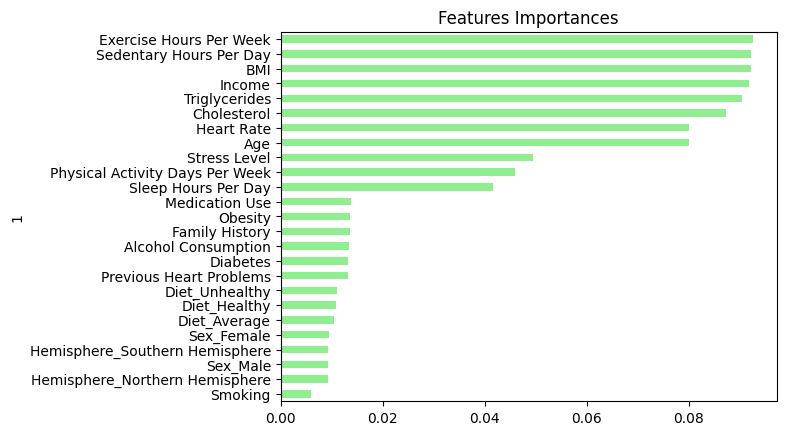

In [38]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)